# Importing necessary modules

In [44]:
import re
import string
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Loading our data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_kindle_review .csv to preprocessed_kindle_review .csv


In [46]:
import io
df = pd.read_csv(io.BytesIO(uploaded["preprocessed_kindle_review .csv"]))

## Printing dimension of the data

In [47]:
df.shape

(12000, 4)

## Displaying all the columns of the dataset

In [48]:
df.columns

Index(['Unnamed: 0', 'rating', 'reviewText', 'summary'], dtype='object')

## Quick review of the dataset

In [49]:
df.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


## Printing the first review from the dataset

In [50]:
df.reviewText[0]

'This book was the very first bookmobile book I bought when I was in the school book club. I loved the story then and I bet a dollar to a donut I will love it again. If my memory serves, I bought this book in 5th grade. That would have been about 1961. I am looking forward to reliving the memories.'

## Checking for null values

In [51]:
df.isnull().sum()

Unnamed: 0    0
rating        0
reviewText    0
summary       0
dtype: int64

## The number of each rating

In [52]:
# value_counts() function returns object containing counts of unique values. 
# The resulting object will be in descending order so that the first element is the most frequently-occurring element.

a = df.rating.value_counts()
a

5    3000
4    3000
1    2000
3    2000
2    2000
Name: rating, dtype: int64

## Distribution of rating

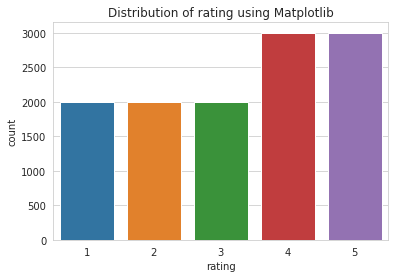

In [53]:
# PLotting Rating histogram

sns.countplot(df.rating)
sns.set_style('whitegrid')
plt.title("Distribution of rating using Matplotlib")
plt.show()

In [54]:
# PLotting Rating using ploty

fig = go.Figure([go.Bar(x=a.index, y=a.values,text=a.values)])
fig.update_layout(title='Distribution of the Rating using ploty')
fig.show()

# Preprocessing Data

### Dropping columns that are not needed

In [55]:
df.columns

Index(['Unnamed: 0', 'rating', 'reviewText', 'summary'], dtype='object')

In [56]:
df = df.drop(['Unnamed: 0', 'summary'], axis=1)

## Preview of the dataset

In [57]:
df.head()

,rating,reviewText
0,5,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,5,I just had to edit this review. This book is a...
3,5,I don't normally buy 'mystery' novels because ...
4,5,"This isn't the kind of book I normally read, a..."


## Converting rating to 0 and 1 from 1-5

#### where 0 is positive and 1 is negative

In [58]:
# if rating is above 3 we will consider it as 1 else 0.

df["rating"] = df["rating"].apply(lambda x: 1 if x < 3  else 0)
df

,rating,reviewText
0,0,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,0,I just had to edit this review. This book is a...
3,0,I don't normally buy 'mystery' novels because ...
4,0,"This isn't the kind of book I normally read, a..."
...,...,...
11995,1,Had to read certain passages twice--typos. Wi...
11996,0,Not what i expected. yet a very interesting bo...
11997,0,Dragon Knights is a world where Knights ride d...
11998,0,"Since this story is very short, it's hard to s..."


## Lowering the case of text

In [59]:
df["reviewText"] = df["reviewText"].str.lower()
df.head()

,rating,reviewText
0,0,this book was the very first bookmobile book i...
1,1,"when i read the description for this book, i c..."
2,0,i just had to edit this review. this book is a...
3,0,i don't normally buy 'mystery' novels because ...
4,0,"this isn't the kind of book i normally read, a..."


##  Removing punctuation from text


In [60]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["reviewText"] = df["reviewText"].apply(lambda text: remove_punctuation(text))
df.head()

,rating,reviewText
0,0,this book was the very first bookmobile book i...
1,1,when i read the description for this book i co...
2,0,i just had to edit this review this book is an...
3,0,i dont normally buy mystery novels because i j...
4,0,this isnt the kind of book i normally read alt...


## Removing stop words from the text

In [61]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["reviewText"] = df["reviewText"].apply(lambda text: remove_stopwords(text))
df.head()

,rating,reviewText
0,0,book first bookmobile book bought school book ...
1,1,read description book couldnt wait read downlo...
2,0,edit review book believe got right updated rew...
3,0,dont normally buy mystery novels dont like how...
4,0,isnt kind book normally read although try limi...


In [62]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["reviewText"] = df["reviewText"].apply(lambda text: lemmatize_words(text))
df.head()

,rating,reviewText
0,0,book first bookmobile book buy school book clu...
1,1,read description book couldnt wait read downlo...
2,0,edit review book believe get right update rewr...
3,0,dont normally buy mystery novels dont like how...
4,0,isnt kind book normally read although try limi...


# Visualization on Dataset

### Plotting distribution of good and bad rating

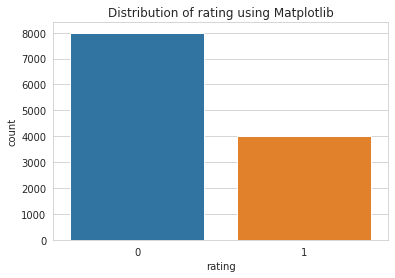

In [64]:
sns.countplot(df.rating)
sns.set_style('whitegrid')
plt.title("Distribution of rating using Matplotlib")
plt.show()

In [65]:
# PLotting Rating using ploty
a  = df.rating.value_counts()
fig = go.Figure([go.Bar(x=a.index, y=a.values,text=a.values)])
fig.update_layout(title='Distribution of the Rating using ploty')
fig.show()

## Plotting word cloud

In [66]:
text = " ".join(cat.split()[0] for cat in df.reviewText)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

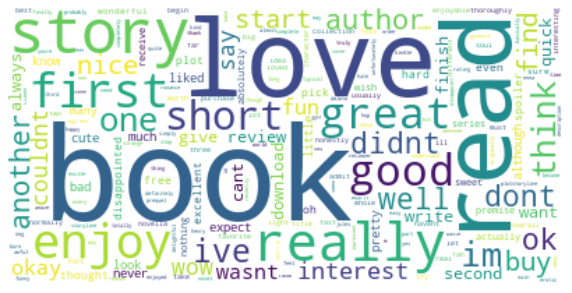

In [67]:
plt.figure(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Top 10 words

In [68]:
from collections import Counter
cnt = Counter()
for text in df["reviewText"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('book', 15397),
 ('story', 11027),
 ('read', 10023),
 ('like', 6207),
 ('one', 5949),
 ('character', 5677),
 ('get', 5453),
 ('love', 5059),
 ('good', 4763),
 ('would', 4093)]

#### Number of times book occurs in dataset

In [69]:
cnt.get("book")

15397

In [70]:
cn = cnt.most_common(10)
w = []
c = []

In [71]:
for i in cn:
    w.append(i[0])
    c.append(i[1])

## Pie chart for Most Frequent Words

In [72]:
fig = px.pie(df, values=c, names=w, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Most Frequent Words")
fig.show()

## Displaying least used words

In [73]:
n_least_used_words = 11
LEASTUSEDWORDS = set([w for (w, wc) in cnt.most_common()[:-n_least_used_words-1:-1]])

In [74]:
LEASTUSEDWORDS

{'1922',
 'backgroung',
 'don8216t',
 'firedrake',
 'gryphon',
 'helos',
 'insite',
 'meaness',
 'relm',
 'symbols',
 'twicetypos'}

# Splitting the data

In [79]:
df['reviewText'].shape

(12000,)

In [80]:
df['rating'].shape

(12000,)

In [82]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

## Vectorising data with CountVectorizer

In [83]:
cv= CountVectorizer(binary=True, min_df = 10, max_df = 0.95)
cv.fit_transform(train['reviewText'].values)
train_feature_set=cv.transform(train['reviewText'].values)
test_feature_set=cv.transform(test['reviewText'].values)

In [84]:
train_feature_set

<9600x4071 sparse matrix of type '<class 'numpy.int64'>'
	with 367781 stored elements in Compressed Sparse Row format>

In [85]:
train_feature_set.shape[1]

4071

In [86]:
cv.vocabulary_['book']

455

In [87]:
y_train = train['rating'].values
y_test = test['rating'].values

# Building our Models

## Logistic Regression

In [88]:
lr = LogisticRegression(random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("The Accuracy of the model is: ",round(metrics.accuracy_score(y_test,y_pred),3))

The Accuracy of the model is:  0.841


In [93]:
confusion_matrix1 = confusion_matrix(y_test, y_pred)

Text(33.0, 0.5, 'True label')

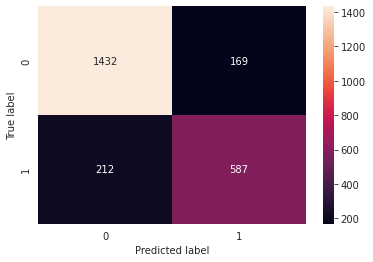

In [95]:
sns.heatmap(confusion_matrix1, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

## K-Nearest Neighbours

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_feature_set,y_train)
y_pred = knn.predict(test_feature_set)
print("The Accuracy of the model is: ",round(metrics.accuracy_score(y_test,y_pred),3))

The Accuracy of the model is:  0.688


Text(33.0, 0.5, 'True label')

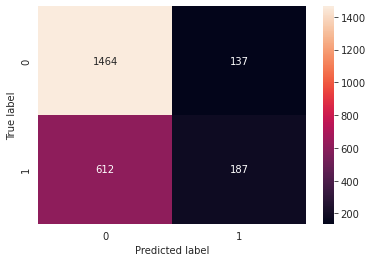

In [97]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix2, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

## Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_feature_set,y_train)
y_pred = dt.predict(test_feature_set)
print("The Accuracy of the model is: ",round(metrics.accuracy_score(y_test,y_pred),3))

The Accuracy of the model is:  0.693


Text(33.0, 0.5, 'True label')

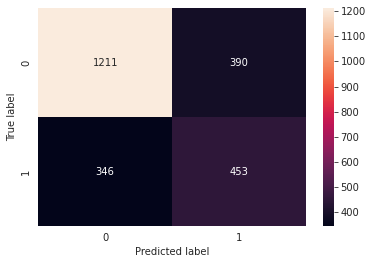

In [100]:
confusion_matrix3 = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix3, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

**Feature Importance**

In [ ]:
feature_importance = lr.coef_[0][:10]
for i,v in enumerate(feature_importance):
    print('Feature: ', list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(i)], 'Score: ', v)

Feature:  099 Score:  0.36978356086841807
Feature:  10 Score:  0.38217347272111557
Feature:  100 Score:  0.467207551540583
Feature:  11 Score:  -0.17769610145918788
Feature:  12 Score:  -1.0082787036947964
Feature:  13 Score:  1.0339826283546725
Feature:  14 Score:  -0.31685556004644116
Feature:  15 Score:  0.5986228887173357
Feature:  16 Score:  0.5798395653906101
Feature:  17 Score:  0.532448640754661


In [ ]:
feature_importance = lr.coef_[0]
sorted_idx = np.argsort(feature_importance)

**Top words for the negative sentiments:**

In [ ]:
top_10_pos_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[range(-1,-11, -1)]]
print(top_10_pos_w)

['recommendations', 'waste', '25', 'worst', 'flat', 'boring', 'cardboard', 'skip', 'depressing', 'sorry']


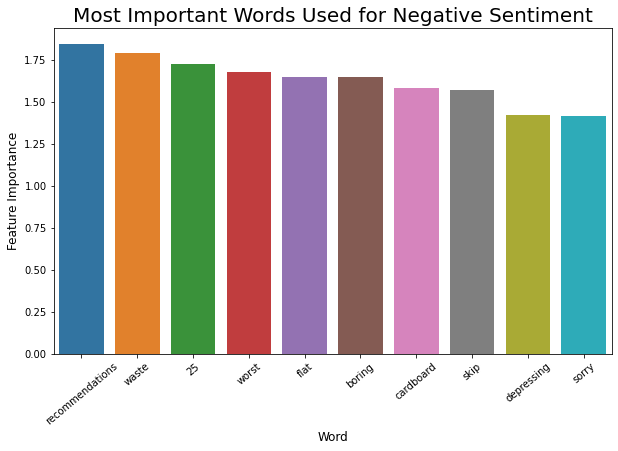

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_pos_w, y=feature_importance[sorted_idx[range(-1,-11, -1)]])
plt.title("Most Important Words Used for Negative Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

**Top words for the positive sentiment**:



In [ ]:
top_10_neg_w = [list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(w)] for w in sorted_idx[:10]]
print(top_10_neg_w)

['enjoyed', 'shot', 'loved', 'enjoyable', 'hot', 'wellwritten', 'pleasantly', 'hunter', 'verne', 'fun']


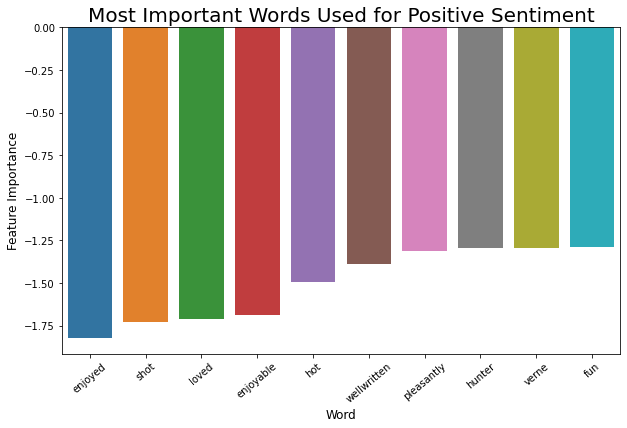

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_neg_w, y=feature_importance[sorted_idx[:10]])
plt.title("Most Important Words Used for Positive Sentiment",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 40)
plt.ylabel('Feature Importance', fontsize = 12)
plt.xlabel('Word', fontsize = 12);

**# Deep Learning**

#### LSTM 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
#factorize the data i.e covert the text into numbers
sentiment_label = data.rating.factorize()
sentiment_label

(array([0, 1, 0, ..., 0, 0, 0]), Int64Index([0, 1], dtype='int64'))

In [ ]:
#tokenize the sentences i.e. break them down into smaller bits
tweet = data.reviewText
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1497408   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,514,059
Trainable params: 1,514,059
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.25,epochs=10,batch_size=64)

Epoch 1/10
141/141 [==============================] - 51s 327ms/step - loss: 0.5723 - accuracy: 0.7048 - val_loss: 0.4267 - val_accuracy: 0.7950
Epoch 2/10
141/141 [==============================] - 49s 345ms/step - loss: 0.3763 - accuracy: 0.8362 - val_loss: 0.3734 - val_accuracy: 0.8333
Epoch 3/10
141/141 [==============================] - 50s 351ms/step - loss: 0.3021 - accuracy: 0.8763 - val_loss: 0.3783 - val_accuracy: 0.8493
Epoch 4/10
141/141 [==============================] - 46s 328ms/step - loss: 0.2525 - accuracy: 0.8968 - val_loss: 0.3781 - val_accuracy: 0.8513
Epoch 5/10
141/141 [==============================] - 47s 337ms/step - loss: 0.2265 - accuracy: 0.9113 - val_loss: 0.4001 - val_accuracy: 0.8407
Epoch 6/10
141/141 [==============================] - 48s 344ms/step - loss: 0.1967 - accuracy: 0.9266 - val_loss: 0.4284 - val_accuracy: 0.8457
Epoch 7/10
141/141 [==============================] - 52s 372ms/step - loss: 0.1768 - accuracy: 0.9324 - val_loss: 0.4804 - val_ac

## Accuracy plot of training and validation dataset

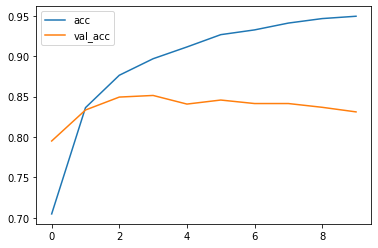

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

## Loss plot of training and validation dataset

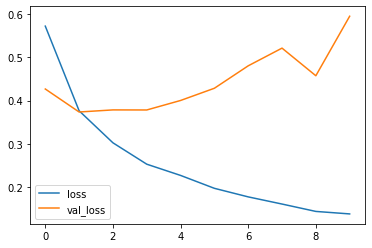

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()